In [43]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [44]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_02'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-24_02
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_02\corrected


In [45]:
file_s1 ='FGDOS_03F_HIGH_C3_Feb_24_21-07-54_s1.csv'
file_s2 ='FGDOS_03F_HIGH_C3_Feb_24_21-07-54_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_02\Arduino_CSV\corrected'+ '\\'+ file_s1 ,engine='python')
df_s2 = pd.read_csv(r'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-24_02\Arduino_CSV\corrected'+ '\\'+ file_s2 ,engine='python')


FGDOS_03F_HIGH_C3_Feb_24_21-07-54_s1.csv
FGDOS_03F_HIGH_C3_Feb_24_21-07-54_s2.csv


In [46]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
#df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,0.0000,1,79,85853,75447,0,7.63,h,0,0
1,249.3327,1,79,85891,75462,0,7.63,h,0,0
2,510.6335,1,80,85906,75439,0,7.63,h,0,0
3,772.9327,1,80,85876,75431,0,7.63,h,0,0
4,1034.2320,1,80,85899,75447,0,7.63,h,0,0


In [47]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('**DISCLAIMER: Beam Energies at target for the tests of 24th Feb 2022 were not known**') 
print('The Beam energies used here are the nominal values!!')


energy = 160          # Nominal Beam Energy in MeV
dose_rate_air = 0.5  # Gy/min
conv_factor = 0.91   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

**DISCLAIMER: Beam Energies at target for the tests of 24th Feb 2022 were not known**

The Beam energies used here are the nominal values!!


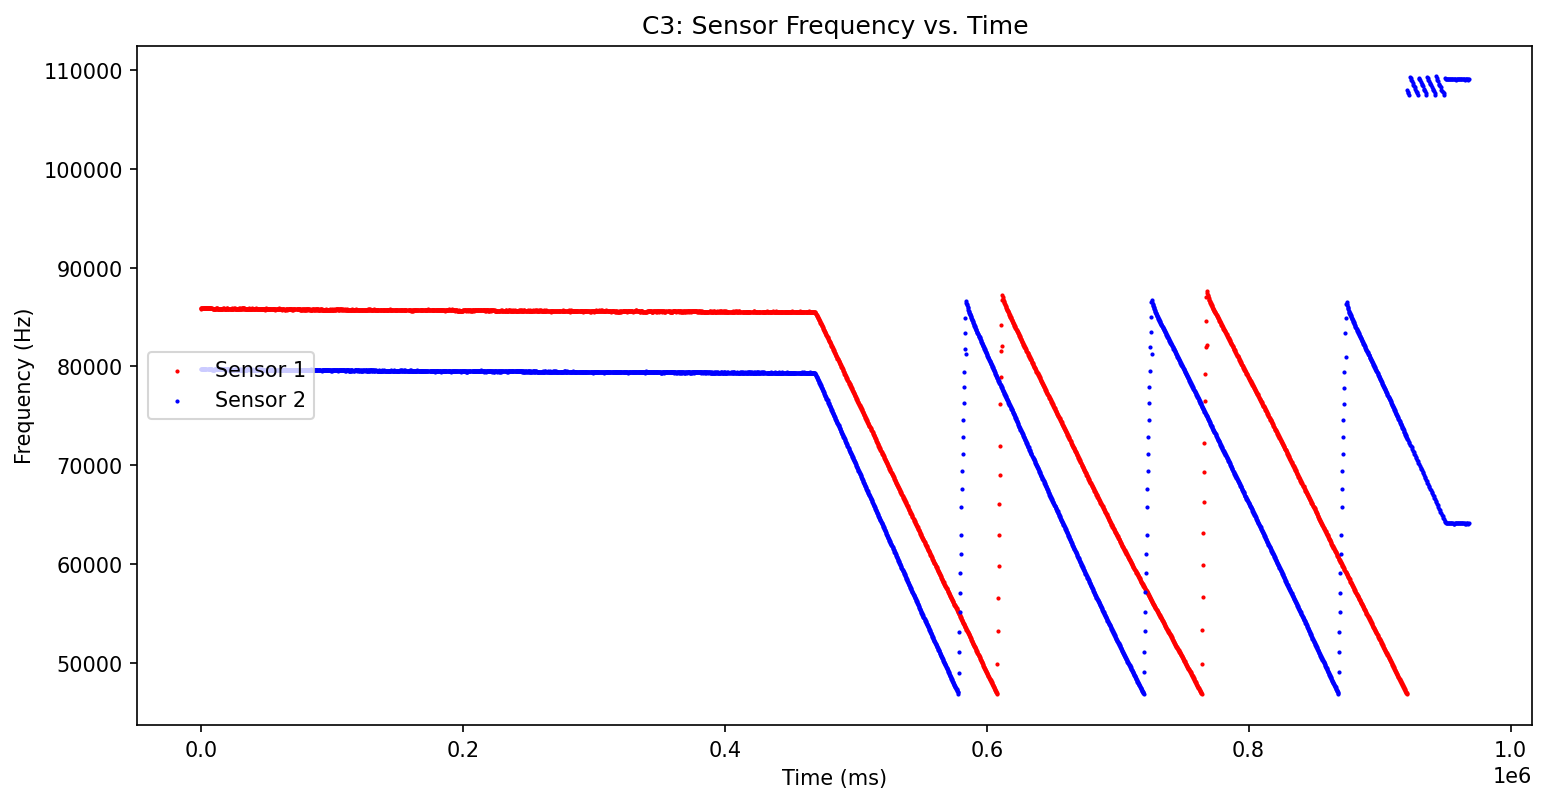

In [48]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(0.6e6,0.71e6)
#plt.xlim(ll_1,ul_1)
#plt.ylim(2.0e5,2.3e5)
plt.legend(loc="center left")
plt.title("C3: Sensor Frequency vs. Time")
plt.show()

In [22]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 0.5e6
ul_1 = 0.58e6
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]
#zone_1[:,0]

ll_2 = 0.62e6
ul_2 = 0.76e6
zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [23]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.5190148371903762
intercept: [91973.01378581]
slope: [[-0.03442074]]
Sensor 1 sensitivity in kHz/Gy:  [[4.53899925]]


In [24]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9999751224701378
intercept: [216245.28931418]
slope: [[-0.2787796]]
Sensor 1 sensitivity in kHz/Gy:  [[36.76214494]]


In [25]:
# Sensitivity Sensor 1 - Zone 2
model_s1 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9993892324330921
intercept: [246167.13720307]
slope: [[-0.26153214]]
Sensor 1 sensitivity in kHz/Gy:  [[34.48775527]]


In [37]:
# Sensor 2 irradiation intervals
ll_1 = 0.5e6
ul_1 = 0.56e6
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

ll_2 = 0.6e6
ul_2 = 0.71e6
zone_2 = s2[(s2[:,0]> ll_2) & (s2[:,0]< ul_2)]

In [38]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.09017162457216177
intercept: [80032.29222599]
slope: [[-0.01260724]]
Sensor 2 sensitivity in kHz/Gy:  [[1.66249289]]


In [39]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9999742674585074
intercept: [219075.86123917]
slope: [[-0.29804164]]
Sensor 2 sensitivity in kHz/Gy:  [[39.30219384]]


In [40]:
# Sensitivity Sensor 2 - Zone 2
model_s2 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)
print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9998508755341913
intercept: [255703.5467248]
slope: [[-0.29100605]]
Sensor 2 sensitivity in kHz/Gy:  [[38.37442402]]


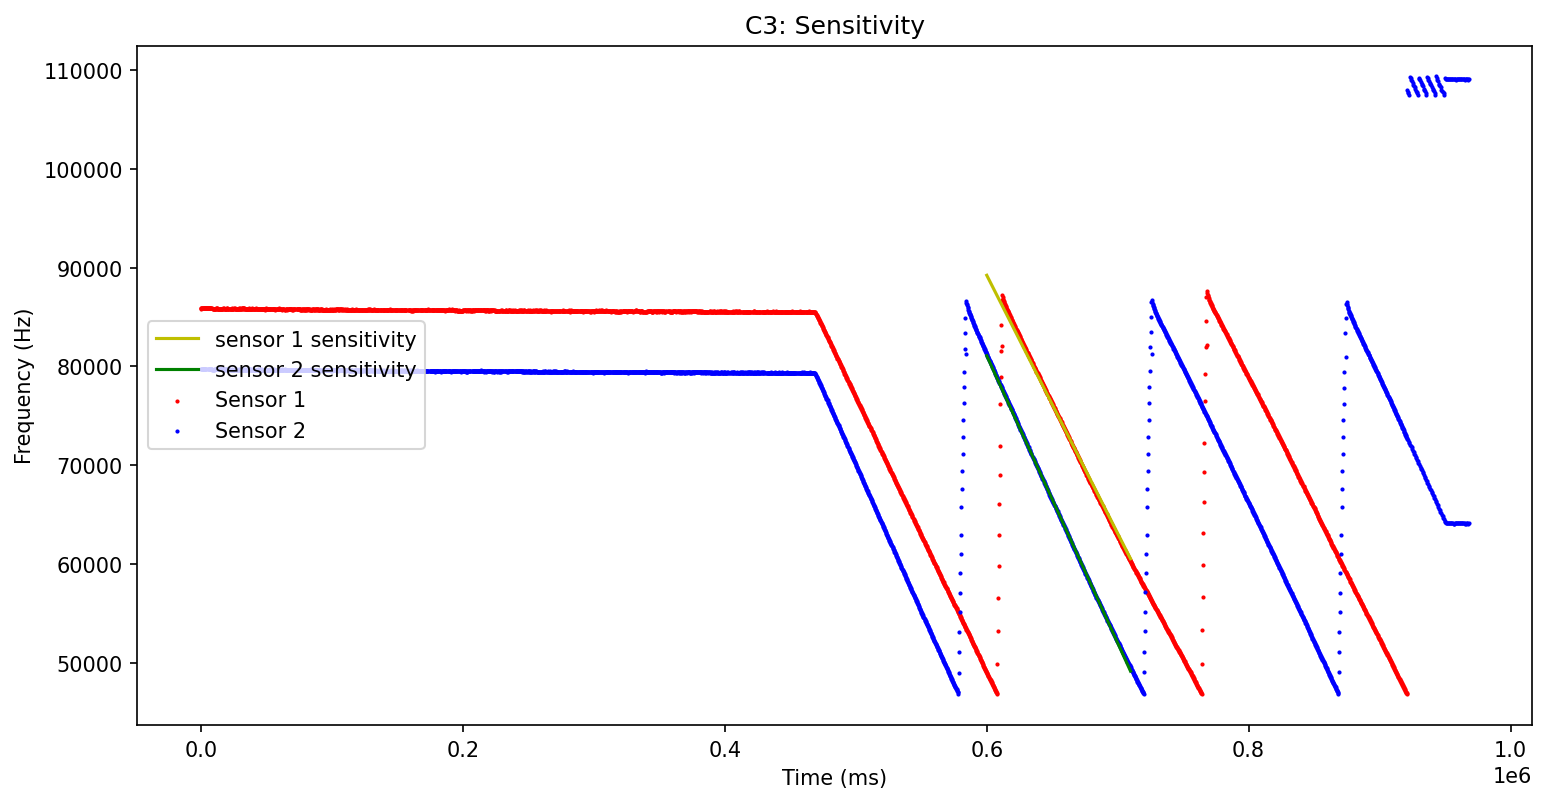

In [42]:
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("C3: Sensitivity")
plt.show()

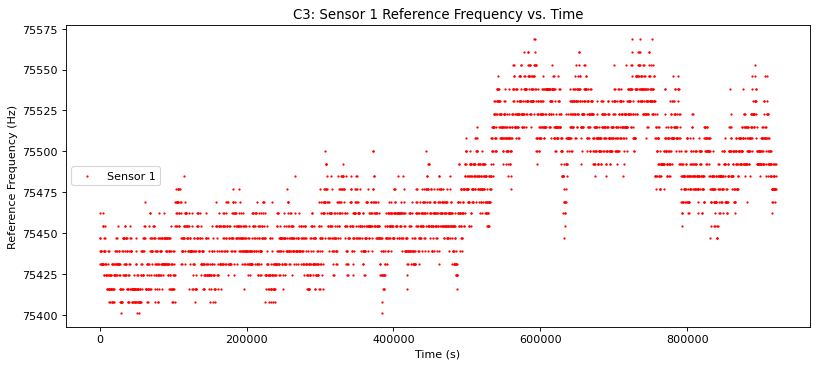

min:  75401
max:  75569
range:  168
mean:  75476.10796515246


In [13]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("C3: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())

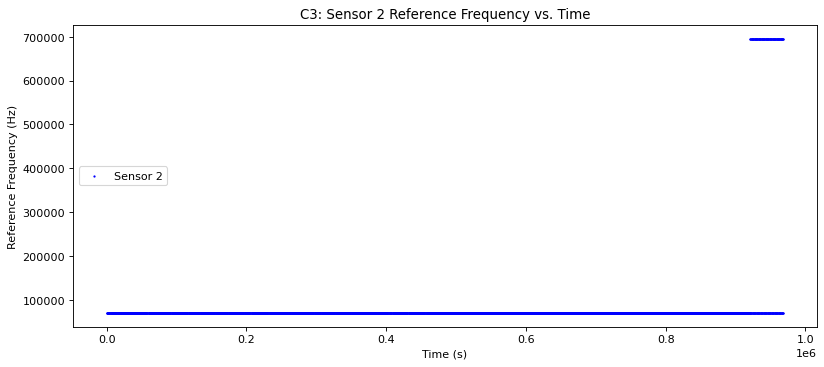

min:  70648
max:  695777
range:  625129
mean:  87409.25725168473


In [14]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("C3: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())

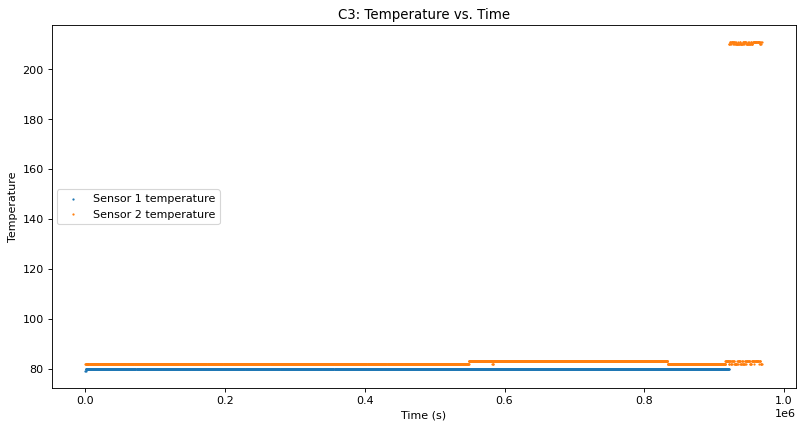

In [15]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,label = 'Sensor 2 temperature')

plt.xlabel('Time (s)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("C3: Temperature vs. Time")
plt.show()

In [16]:
s1[:,0].shape
        

(3214,)

In [28]:
#s1[(s1[:,0]> 3e5)]